# EDA > Visualize

<div class="alert alert-info">Create plots using plotnine (ggplot2 for Python)</div>

The `visualize` function provides a simplified interface to plotnine for common plot types: histograms, density plots, scatter plots, line plots, box plots, and violin plots.

In [1]:
import polars as pl
import pyrsm as rsm

In [2]:
## setup pyrsm for autoreload
%reload_ext autoreload
%autoreload 2
%aimport pyrsm

# Diamonds Dataset

In [3]:
diamonds = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/data/diamonds.parquet")
diamonds

price,carat,clarity,cut,color,depth,table,x,y,z,date
i32,f64,enum,enum,enum,f64,f64,f64,f64,f64,date
580,0.32,"""VS1""","""Ideal""","""H""",61.0,56.0,4.43,4.45,2.71,2012-02-26
650,0.34,"""SI1""","""Very Good""","""G""",63.4,57.0,4.45,4.42,2.81,2012-02-26
630,0.3,"""VS2""","""Very Good""","""G""",63.1,58.0,4.27,4.23,2.68,2012-02-26
706,0.35,"""VVS2""","""Ideal""","""H""",59.2,56.0,4.6,4.65,2.74,2012-02-26
1080,0.4,"""VS2""","""Premium""","""F""",62.6,58.0,4.72,4.68,2.94,2012-02-26
…,…,…,…,…,…,…,…,…,…,…
4173,1.14,"""SI1""","""Very Good""","""J""",63.3,55.0,6.6,6.67,4.2,2015-12-01
8396,1.51,"""SI1""","""Ideal""","""I""",61.2,60.0,7.39,7.37,4.52,2015-12-01
449,0.32,"""VS2""","""Premium""","""I""",62.6,58.0,4.37,4.42,2.75,2015-12-01


In [4]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/pyrsm/refs/heads/main/examples/data/data/diamonds_description.md")

## Diamond prices

Prices of 3,000 round cut diamonds

### Description

A dataset containing the prices and other attributes of a sample of 3000 diamonds. The variables are as follows:

### Variables

- price = price in US dollars ($338--$18,791)
- carat = weight of the diamond (0.2--3.00)
- clarity = a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- cut = quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color = diamond color, from J (worst) to D (best)
- depth = total depth percentage = z / mean(x, y) = 2 * z / (x + y) (54.2--70.80)
- table = width of top of diamond relative to widest point (50--69)
- x = length in mm (3.73--9.42)
- y = width in mm (3.71--9.29)
- z = depth in mm (2.33--5.58)
- date = shipment date

### Additional information

<a href="http://www.diamondse.info/diamonds-clarity.asp" target="_blank">Diamond search engine</a>


## Histogram (Numeric Variable)

For numeric variables, `geom="dist"` creates a histogram.

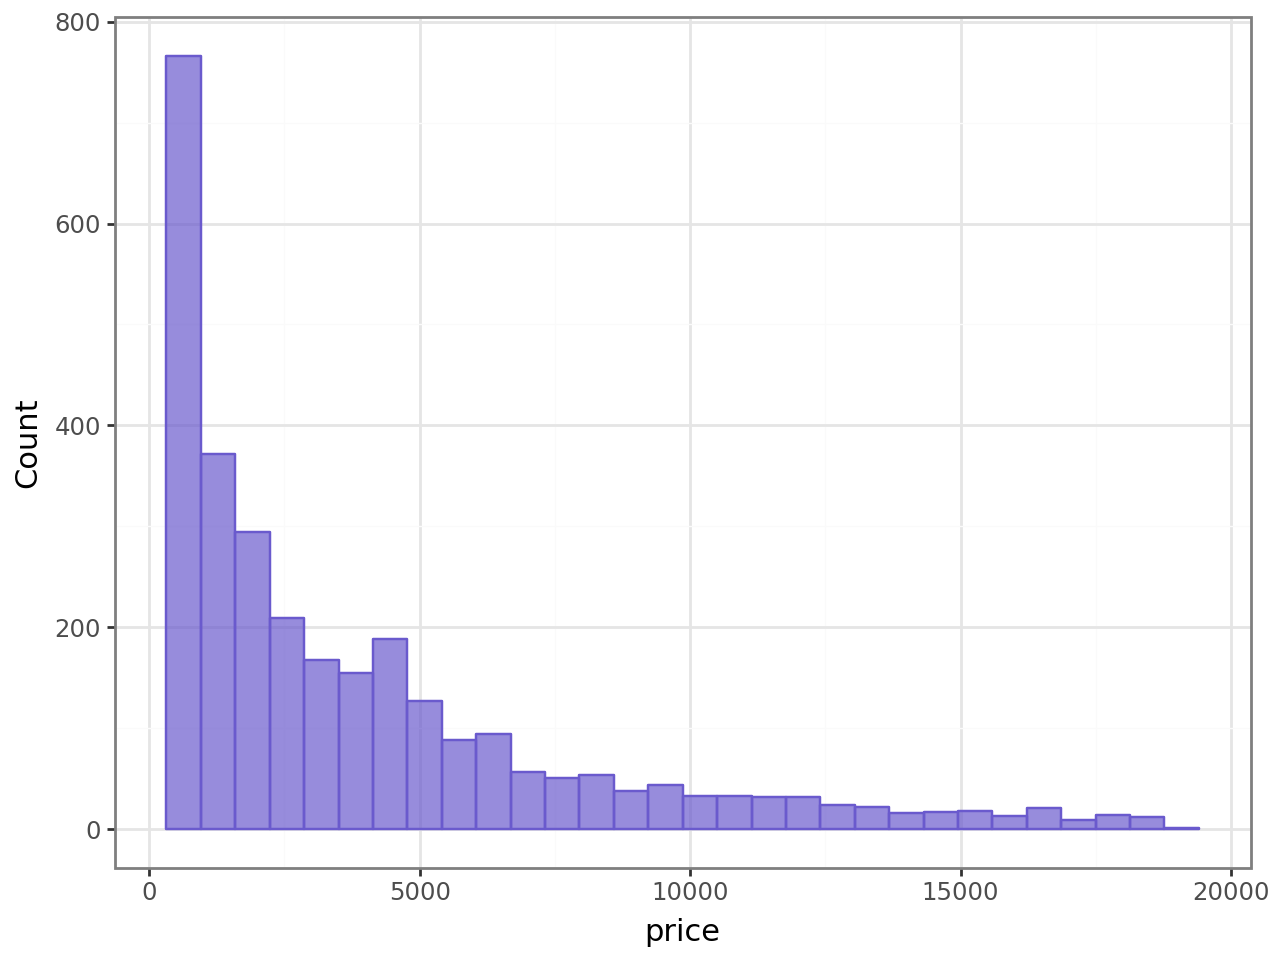

In [5]:
rsm.eda.visualize(diamonds, x="price")

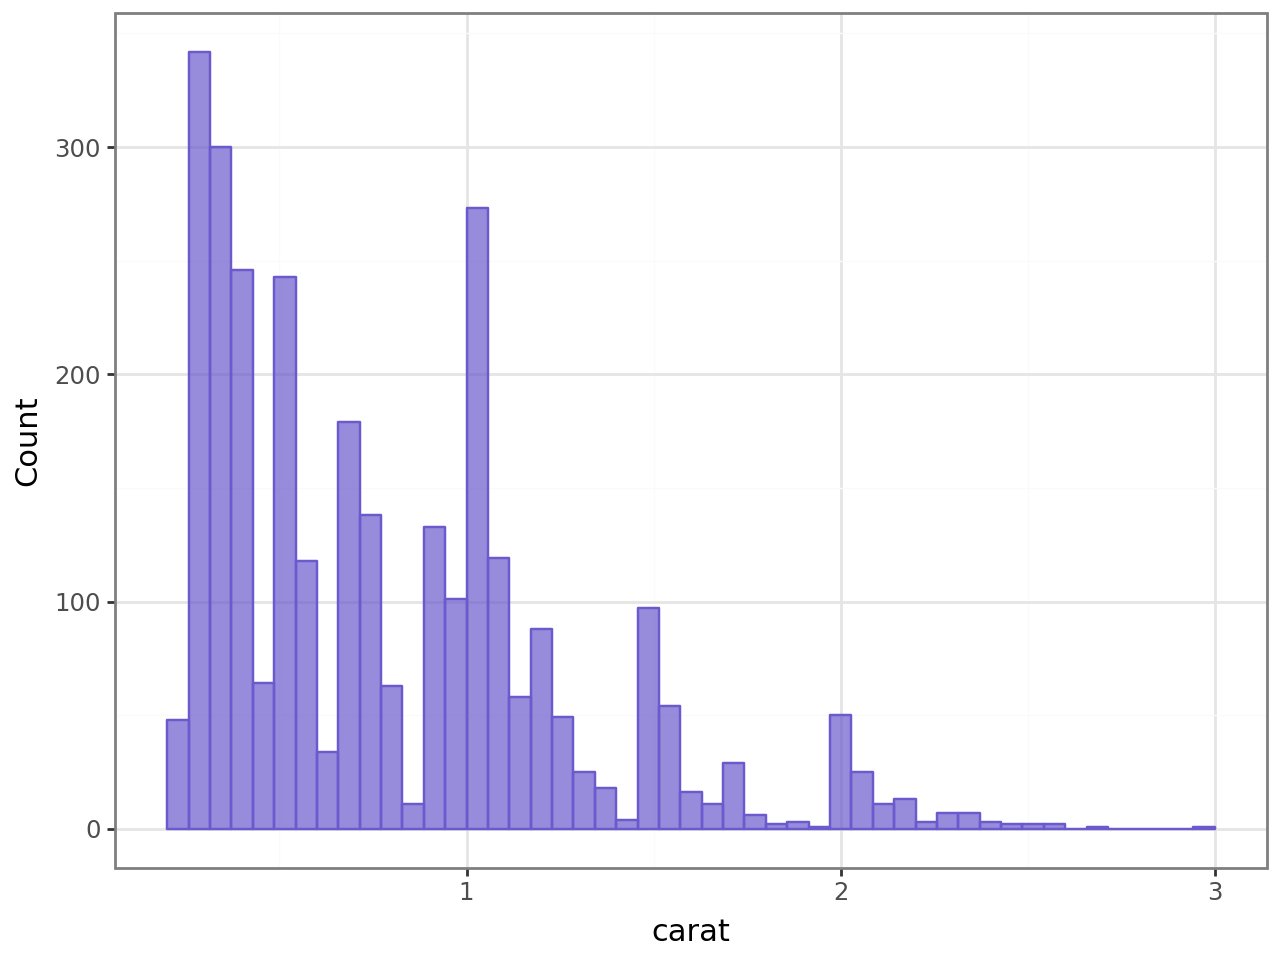

In [6]:
rsm.eda.visualize(diamonds, x="carat", bins=50)

## Bar Chart (Categorical Variable)

For categorical variables, `geom="dist"` automatically creates a bar chart.

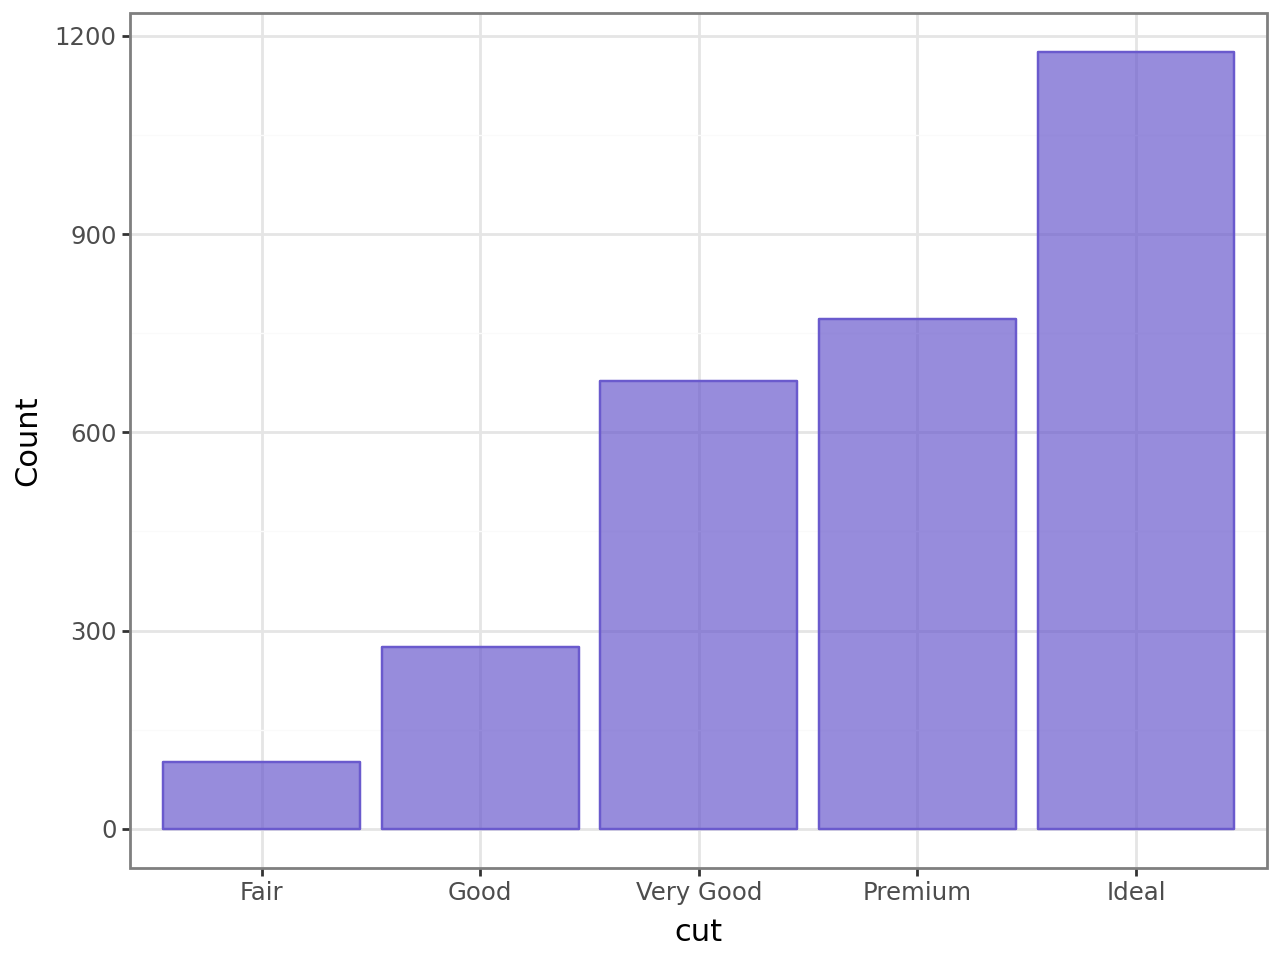

In [7]:
rsm.eda.visualize(diamonds, x="cut")

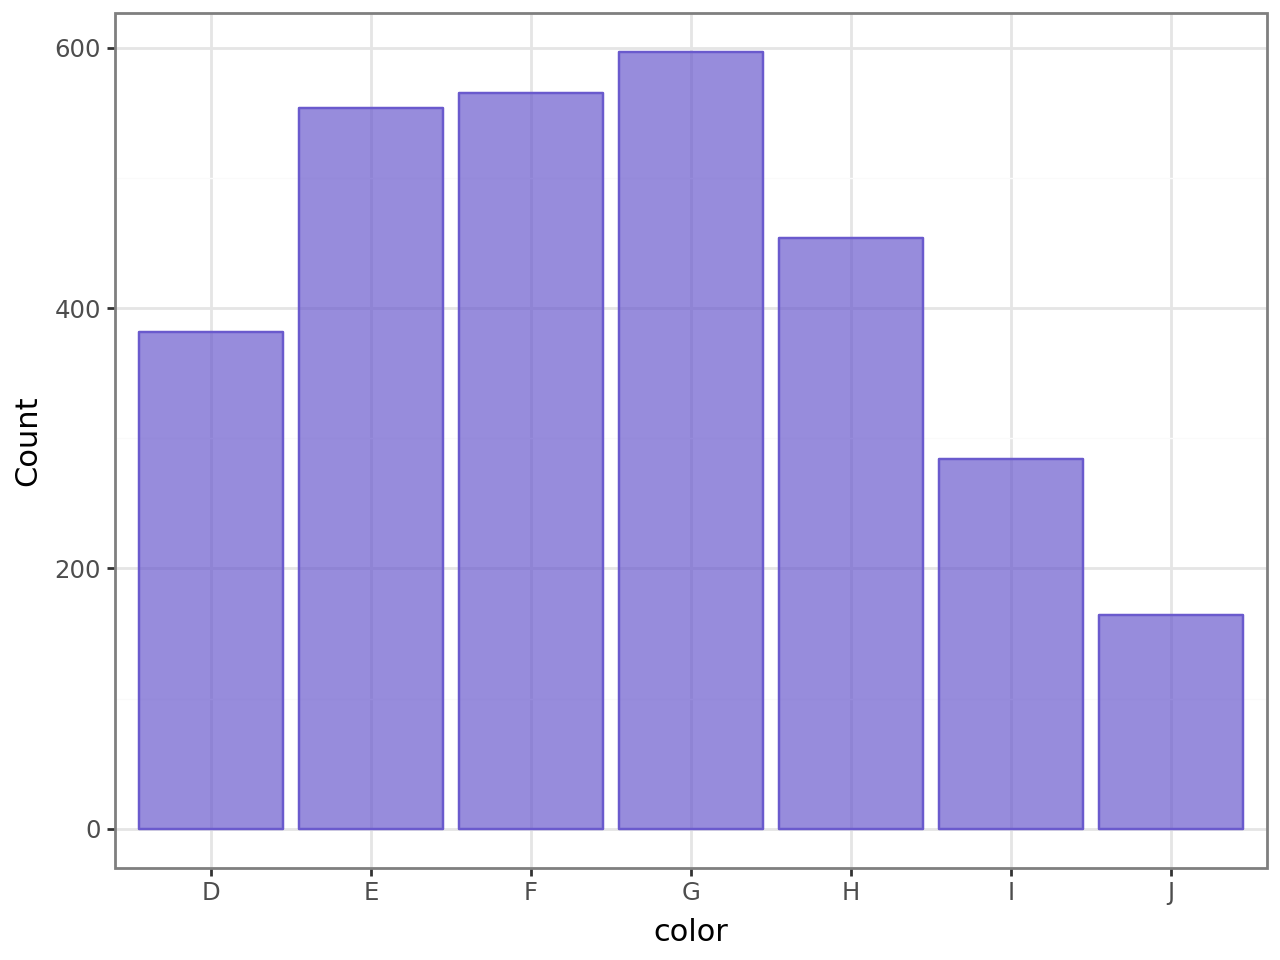

In [8]:
rsm.eda.visualize(diamonds, x="color")

## Density Plot

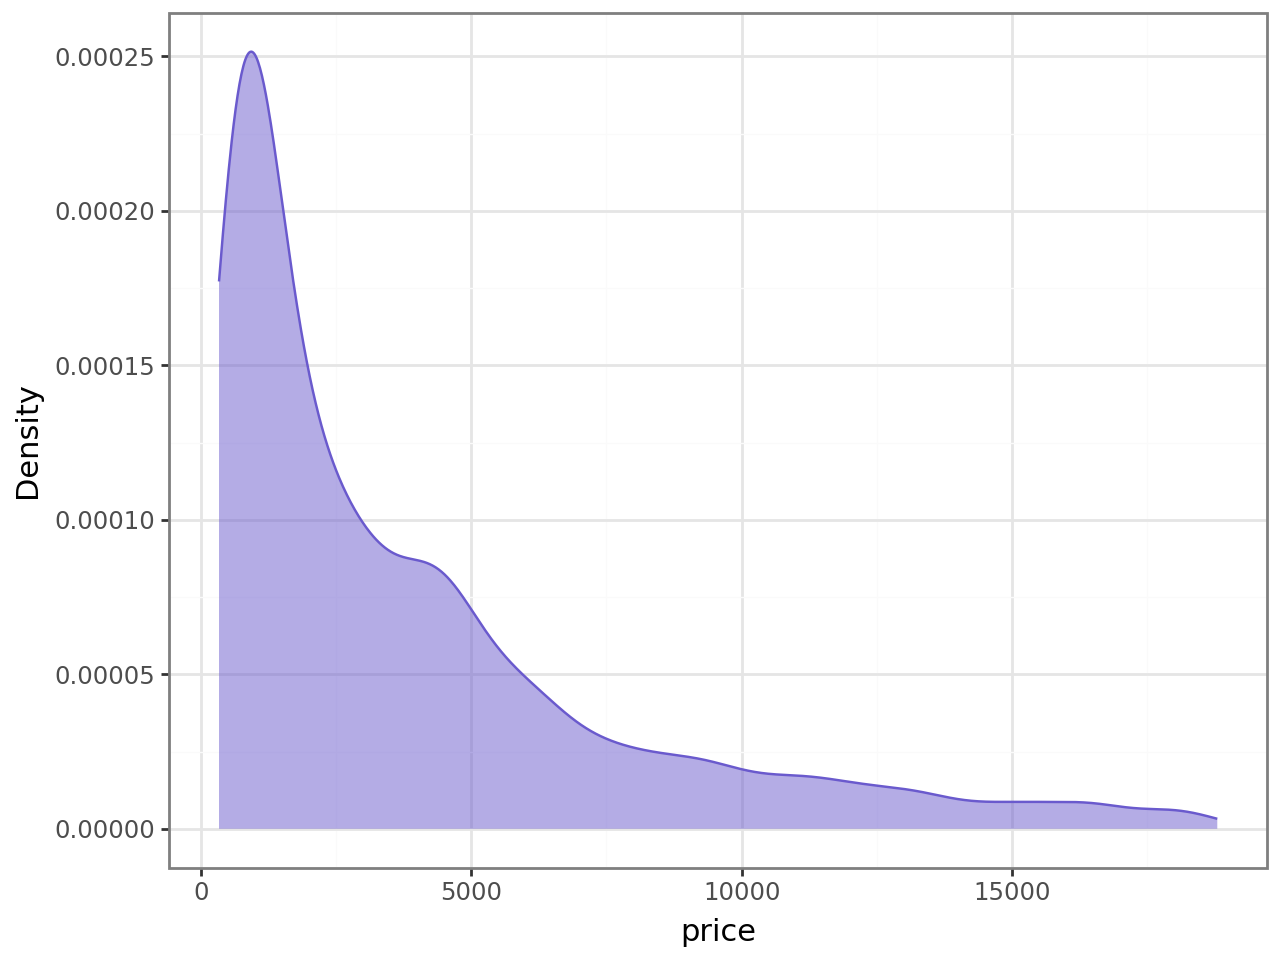

In [9]:
rsm.eda.visualize(diamonds, x="price", geom="density")

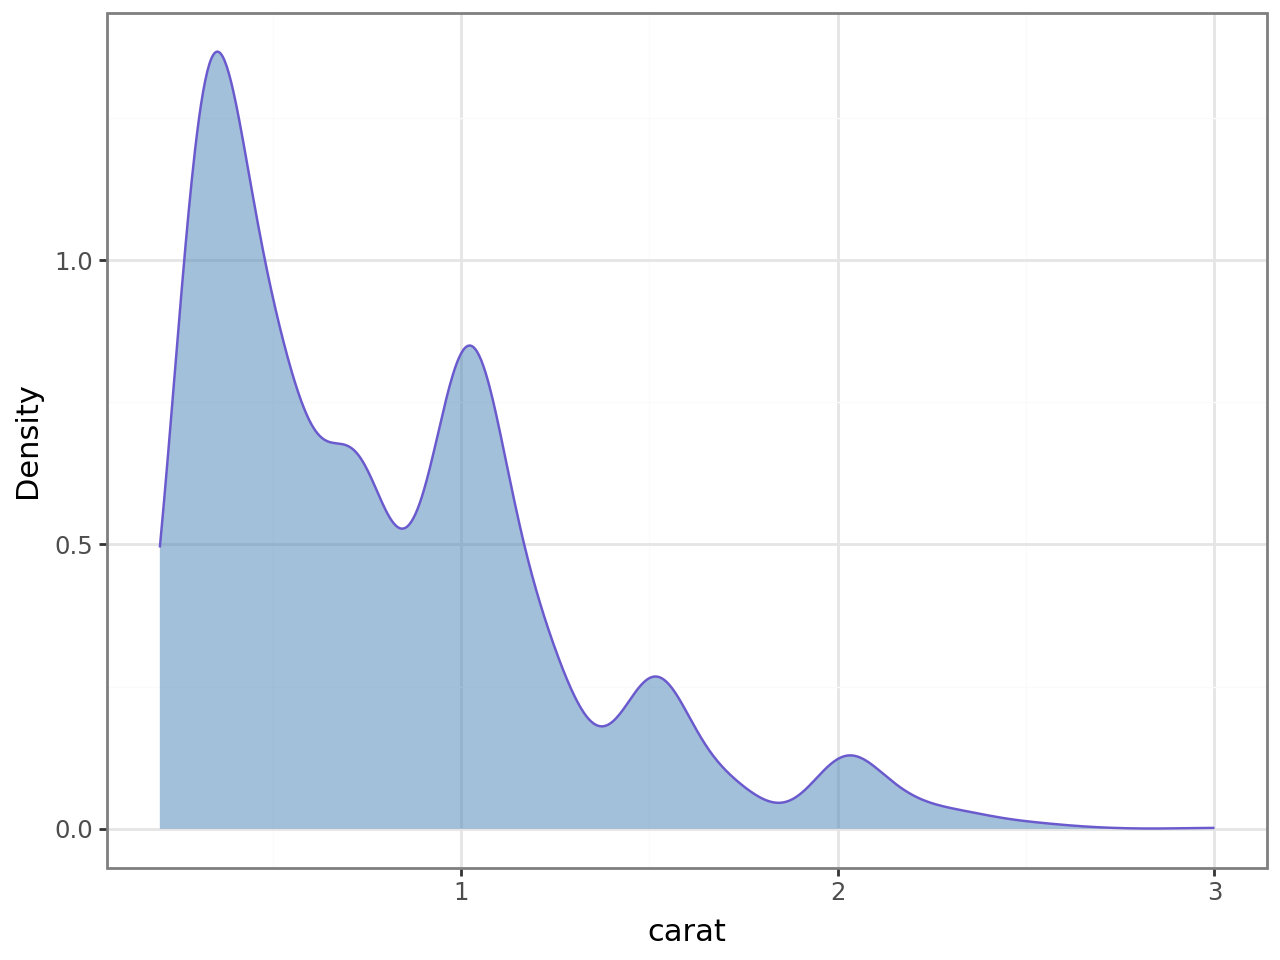

In [10]:
rsm.eda.visualize(diamonds, x="carat", geom="density", fill="steelblue")

## Scatter Plot

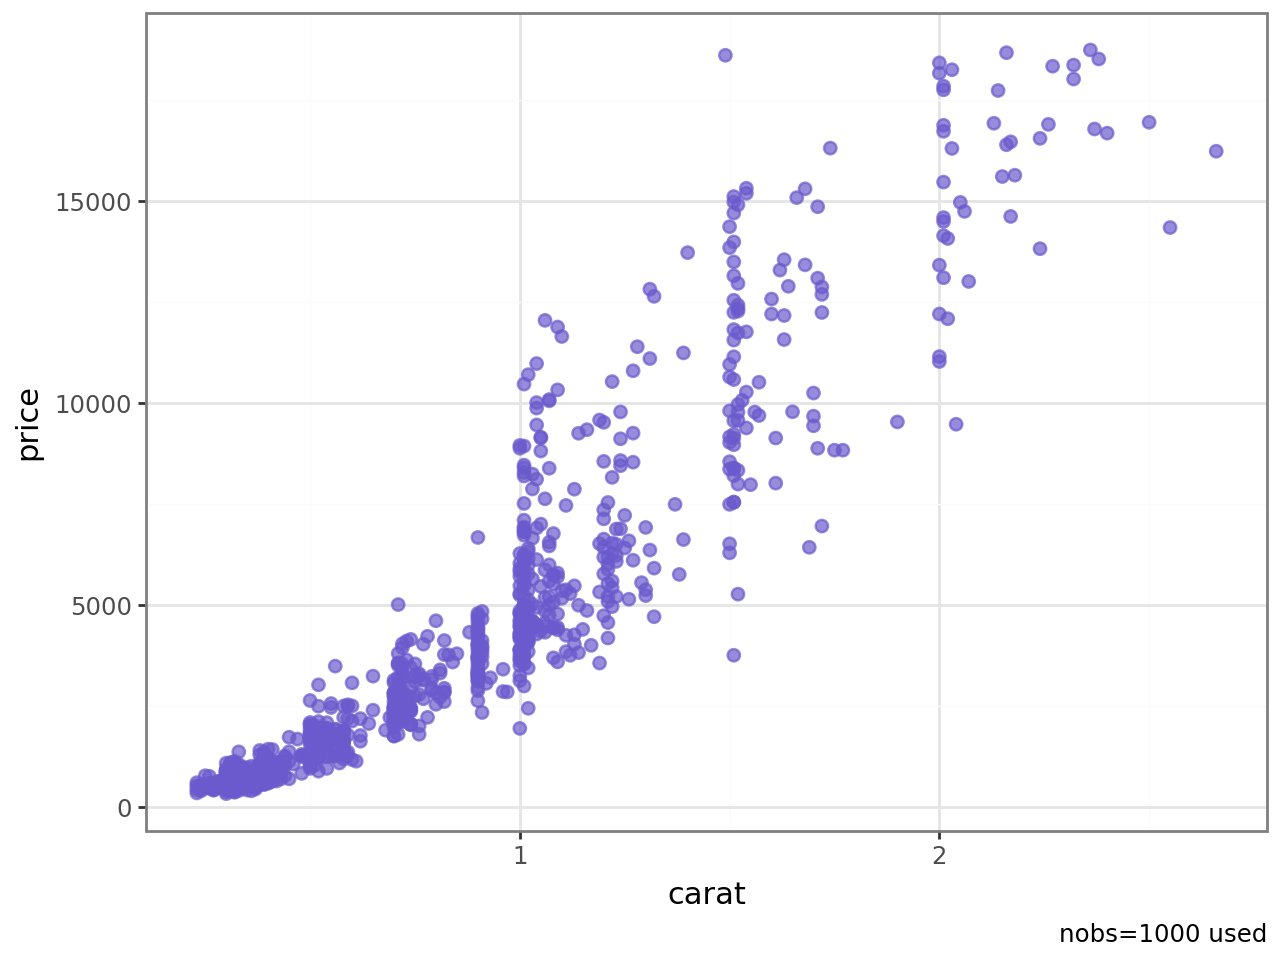

In [11]:
rsm.eda.visualize(diamonds, x="carat", y="price")

## Scatter Plot with Color

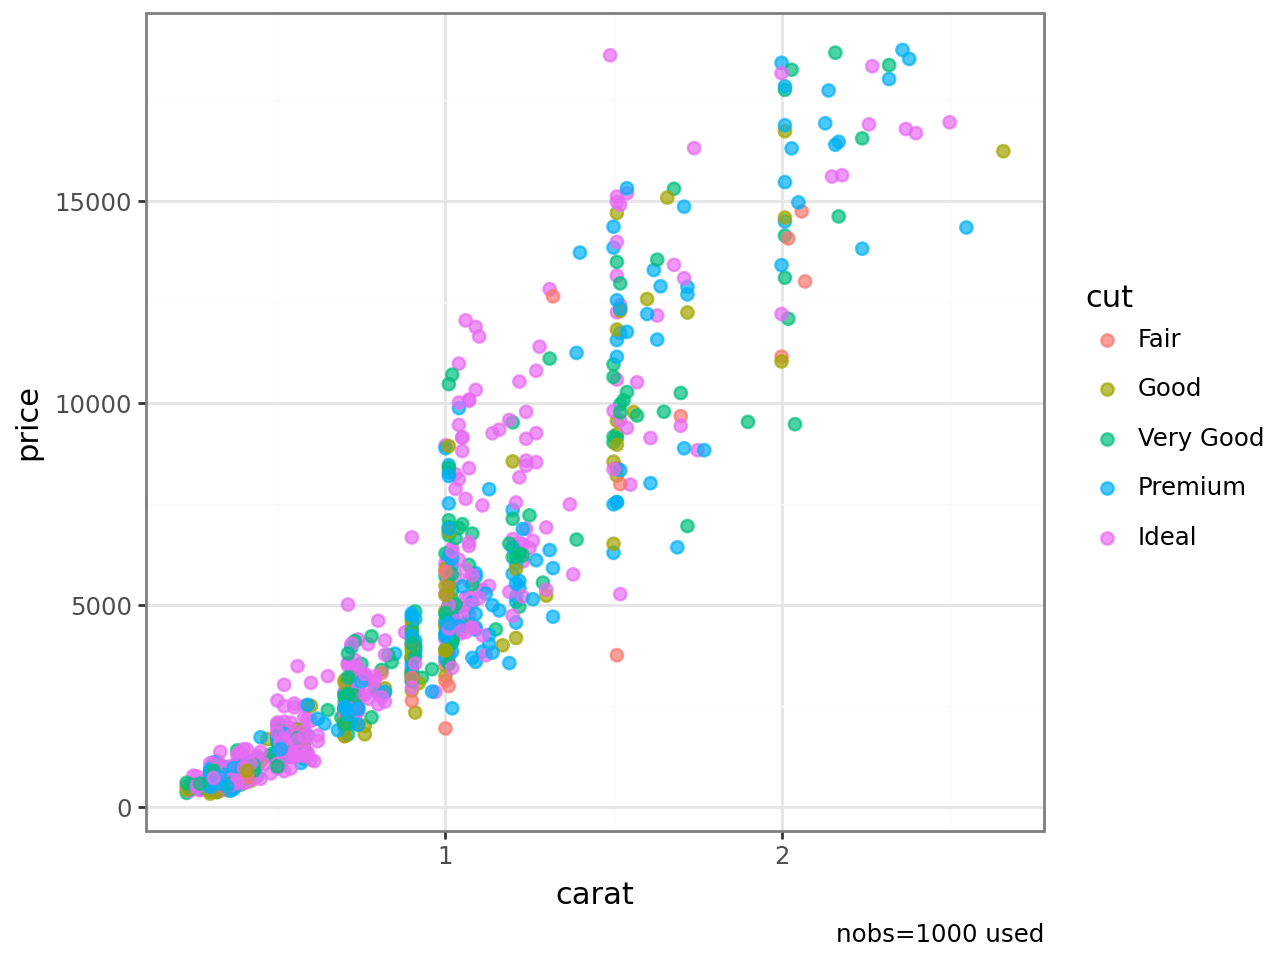

In [12]:
rsm.eda.visualize(diamonds, x="carat", y="price", color="cut")

## Scatter Plot with Regression Line

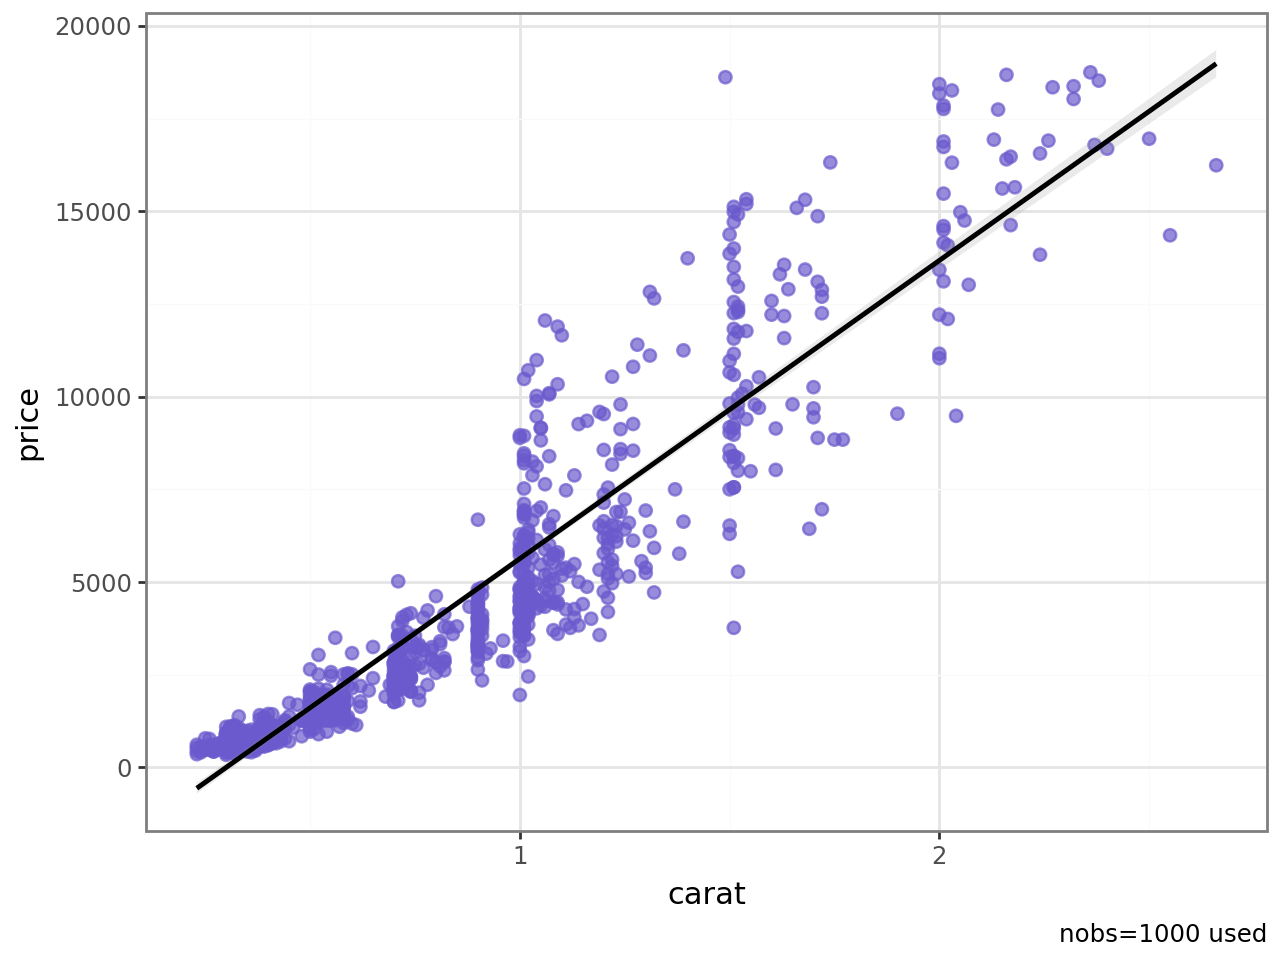

In [13]:
rsm.eda.visualize(diamonds, x="carat", y="price", smooth="lm")

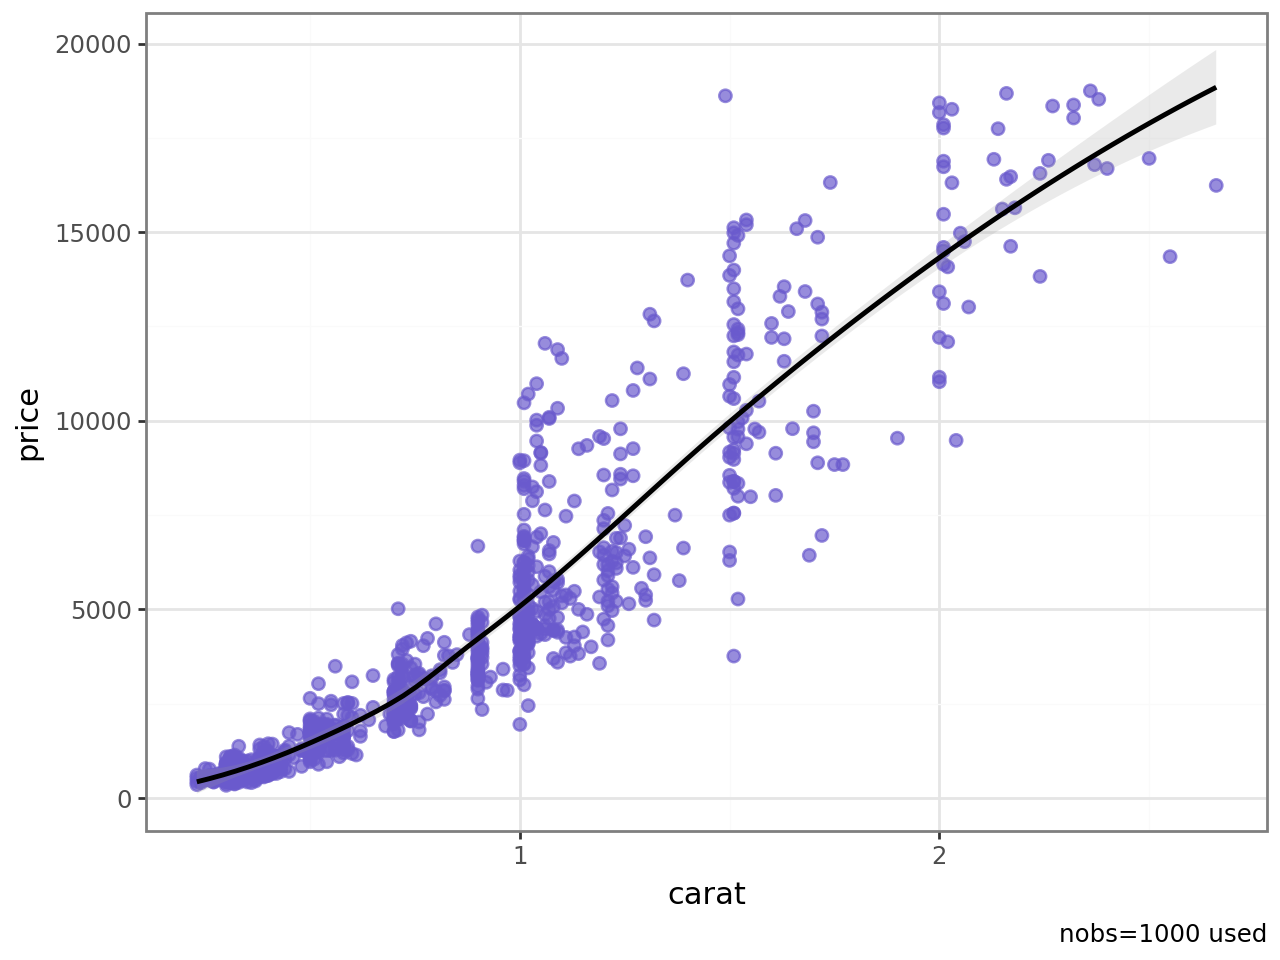

In [14]:
rsm.eda.visualize(diamonds, x="carat", y="price", smooth="loess")

## Box Plot

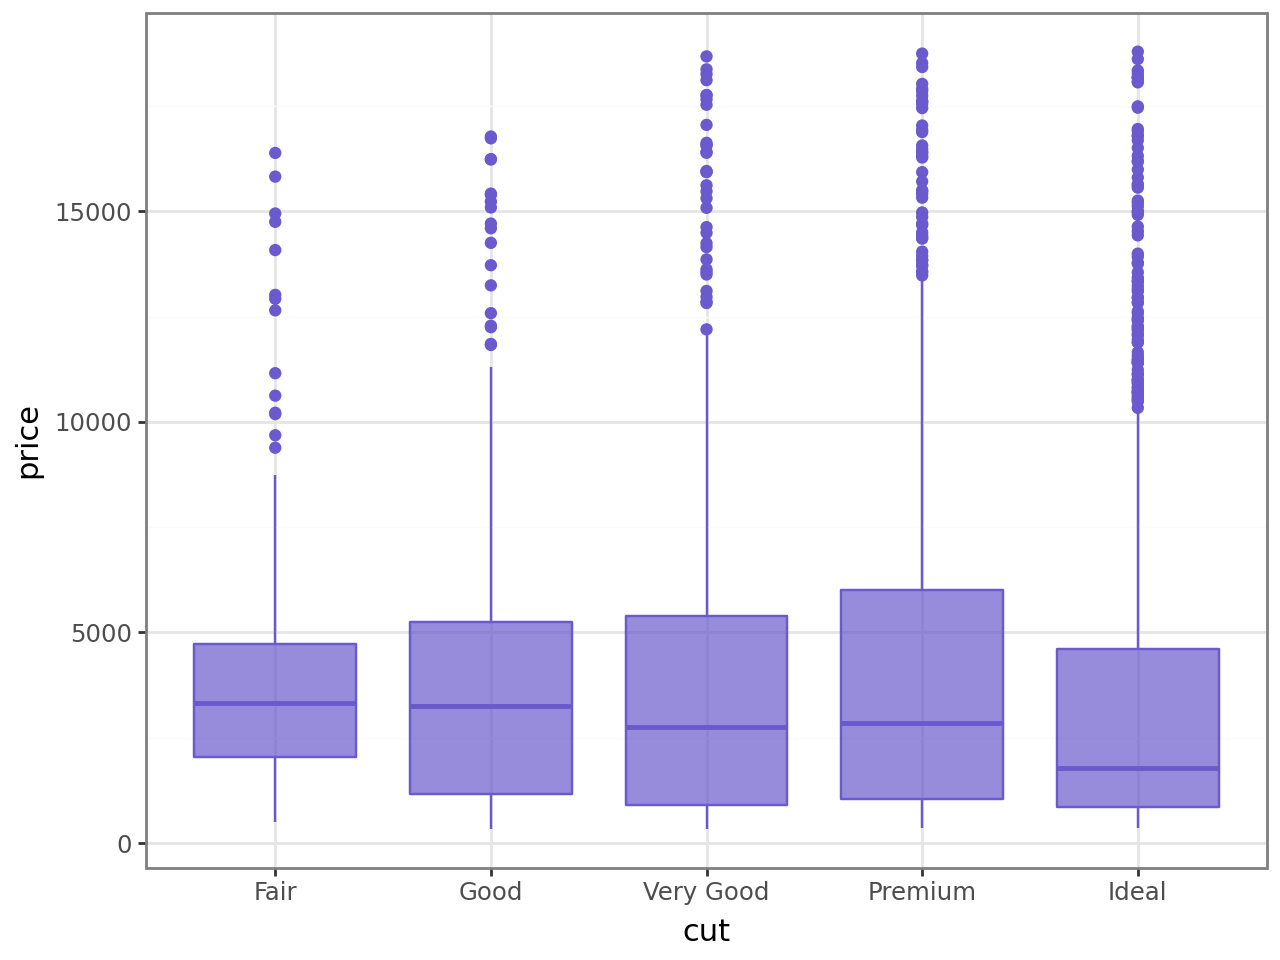

In [15]:
rsm.eda.visualize(diamonds, x="cut", y="price", geom="box")

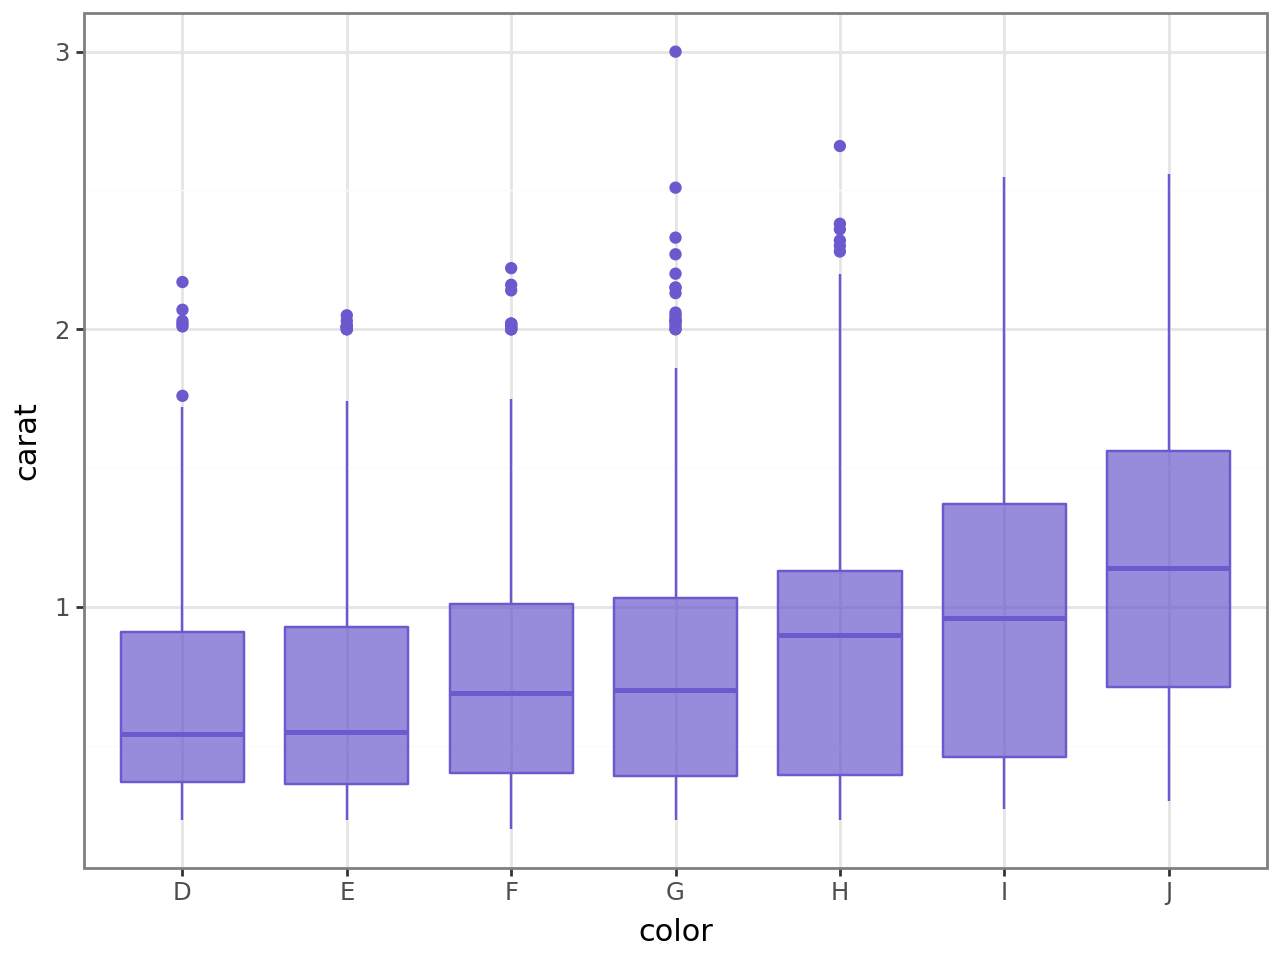

In [16]:
rsm.eda.visualize(diamonds, x="color", y="carat", geom="box")

## Violin Plot

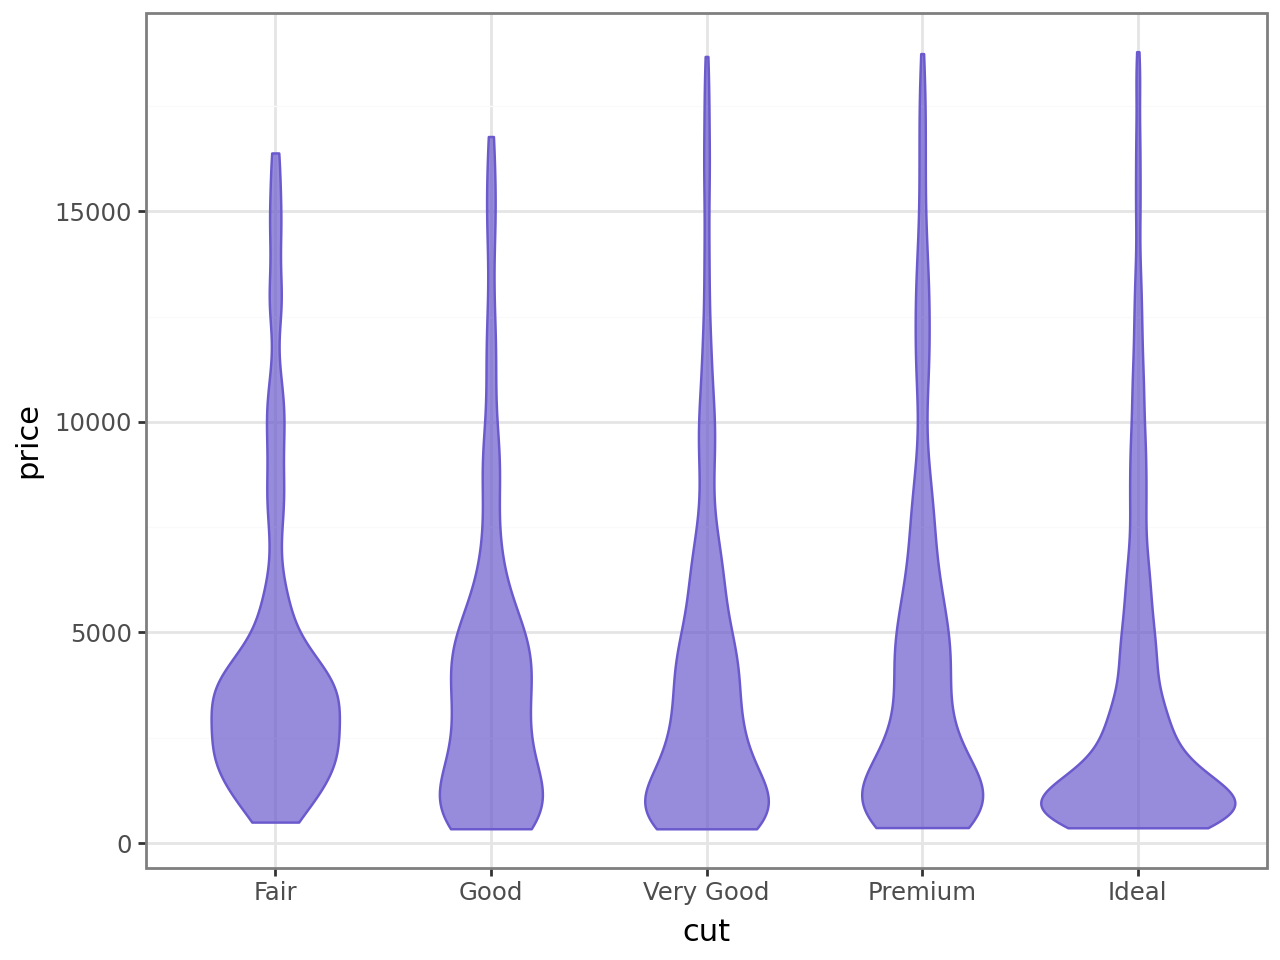

In [17]:
rsm.eda.visualize(diamonds, x="cut", y="price", geom="violin")

## Faceted Plots

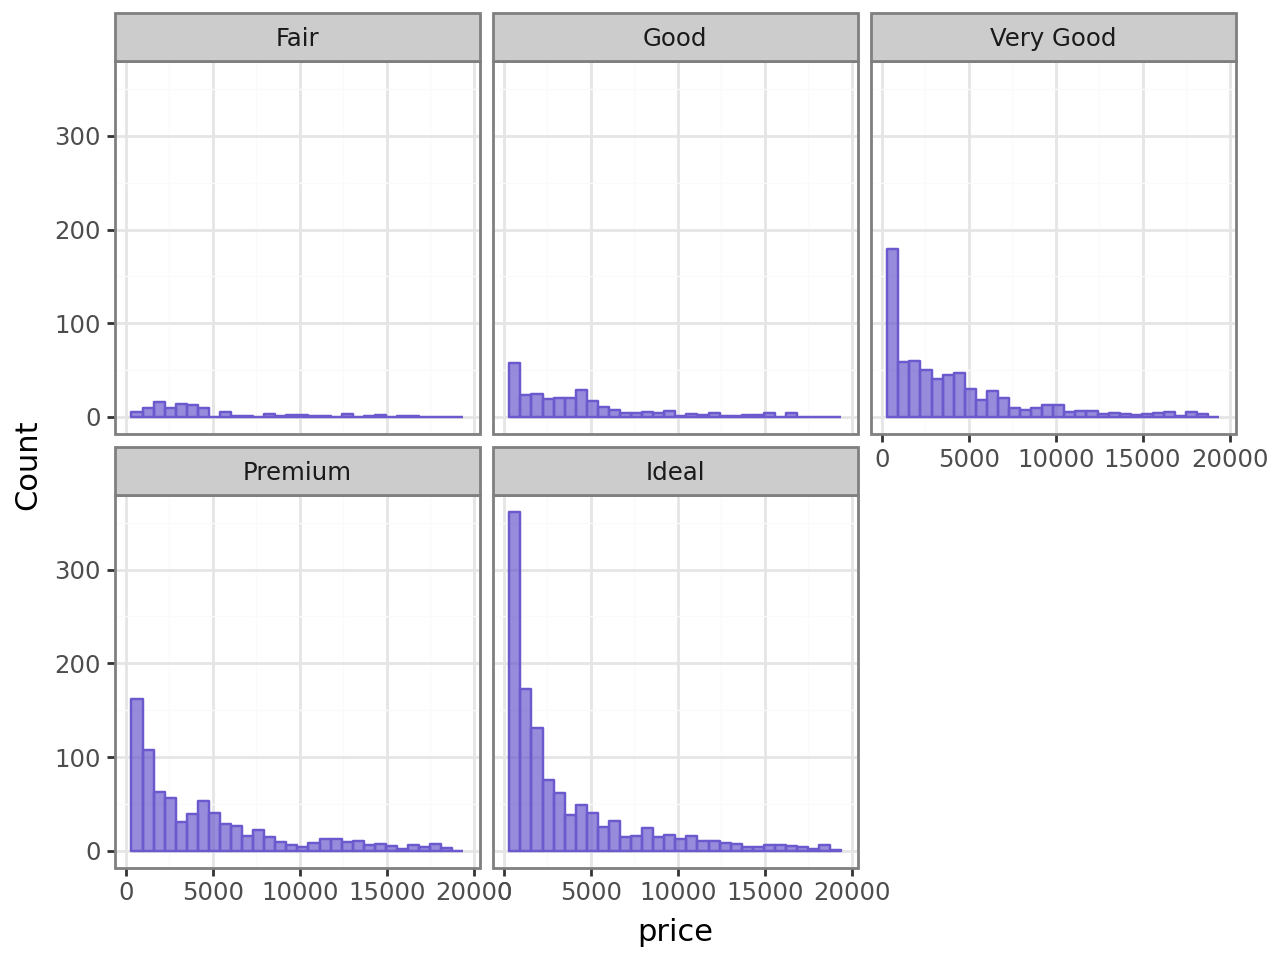

In [18]:
rsm.eda.visualize(diamonds, x="price", facet="cut")

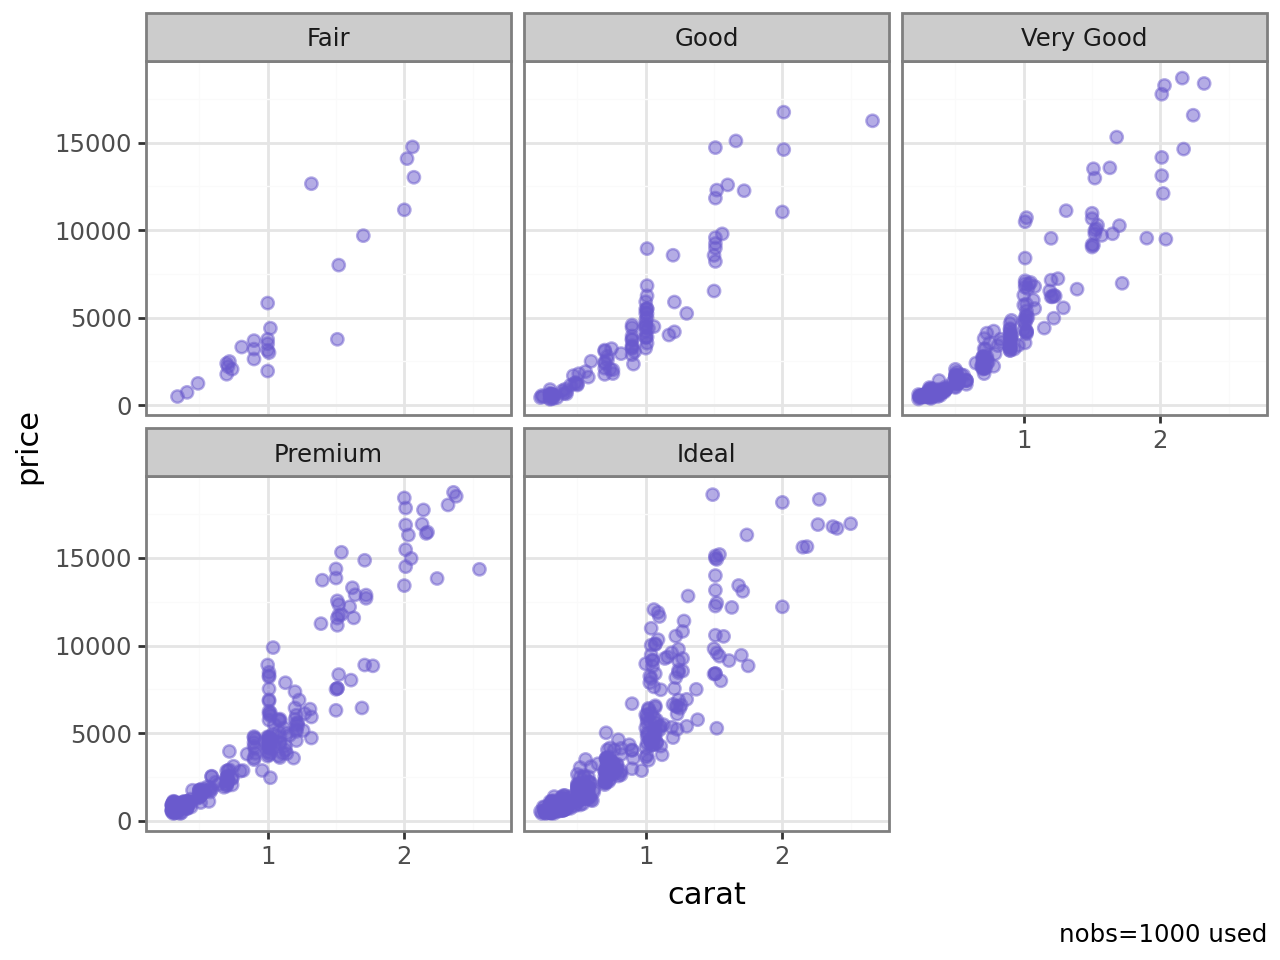

In [19]:
rsm.eda.visualize(diamonds, x="carat", y="price", facet="cut", alpha=0.5)

# Titanic Dataset

In [20]:
titanic = pl.read_parquet("https://github.com/radiant-ai-hub/pyrsm/raw/refs/heads/main/examples/data/data/titanic.parquet")
titanic


pclass,survived,sex,age,sibsp,parch,fare,name,cabin,embarked
enum,enum,enum,f64,i32,i32,f64,str,str,enum
"""1st""","""Yes""","""female""",29.0,0,0,211.337494,"""Allen, Miss. Elisabeth Walton""","""B5""","""Southampton"""
"""1st""","""Yes""","""male""",0.9167,1,2,151.550003,"""Allison, Master. Hudson Trevor""","""C22 C26""","""Southampton"""
"""1st""","""No""","""female""",2.0,1,2,151.550003,"""Allison, Miss. Helen Loraine""","""C22 C26""","""Southampton"""
"""1st""","""No""","""male""",30.0,1,2,151.550003,"""Allison, Mr. Hudson Joshua Cre…","""C22 C26""","""Southampton"""
"""1st""","""No""","""female""",25.0,1,2,151.550003,"""Allison, Mrs. Hudson J C (Bess…","""C22 C26""","""Southampton"""
…,…,…,…,…,…,…,…,…,…
"""3rd""","""No""","""male""",45.5,0,0,7.2249999,"""Youseff, Mr. Gerious""","""""","""Cherbourg"""
"""3rd""","""No""","""female""",14.5,1,0,14.4542,"""Zabour, Miss. Hileni""","""""","""Cherbourg"""
"""3rd""","""No""","""male""",26.5,0,0,7.2249999,"""Zakarian, Mr. Mapriededer""","""""","""Cherbourg"""


In [21]:
rsm.md("https://raw.githubusercontent.com/radiant-ai-hub/pyrsm/refs/heads/main/examples/data/data/titanic_description.md")

## Titanic

This dataset describes the survival status of individual passengers on the Titanic. The titanic data frame does not contain information from the crew, but it does contain actual ages of (some of) the passengers. The principal source for data about Titanic passengers is the Encyclopedia Titanica. One of the original sources is Eaton & Haas (1994) Titanic: Triumph and Tragedy, Patrick Stephens Ltd, which includes a passenger list created by many researchers and edited by Michael A. Findlay.

## Variables

* survival - Survival (Yes, No)
* pclass - Passenger Class (1st, 2nd, 3rd)
* sex - Sex (female, male)
* age - Age in years
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* fare - Passenger Fare
* name - Name
* cabin - Cabin
* embarked - Port of Embarkation (Cherbourg, Queenstown, Southampton)

##  Notes

`pclass` is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1). If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws. Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

Note: Missing values and the `ticket` variable were removed from the data

## Related reading

<a href="http://phys.org/news/2012-07-shipwrecks-men-survive.html" target="_blank">In shipwrecks, men more likely to survive</a>

## Passenger Distribution by Class

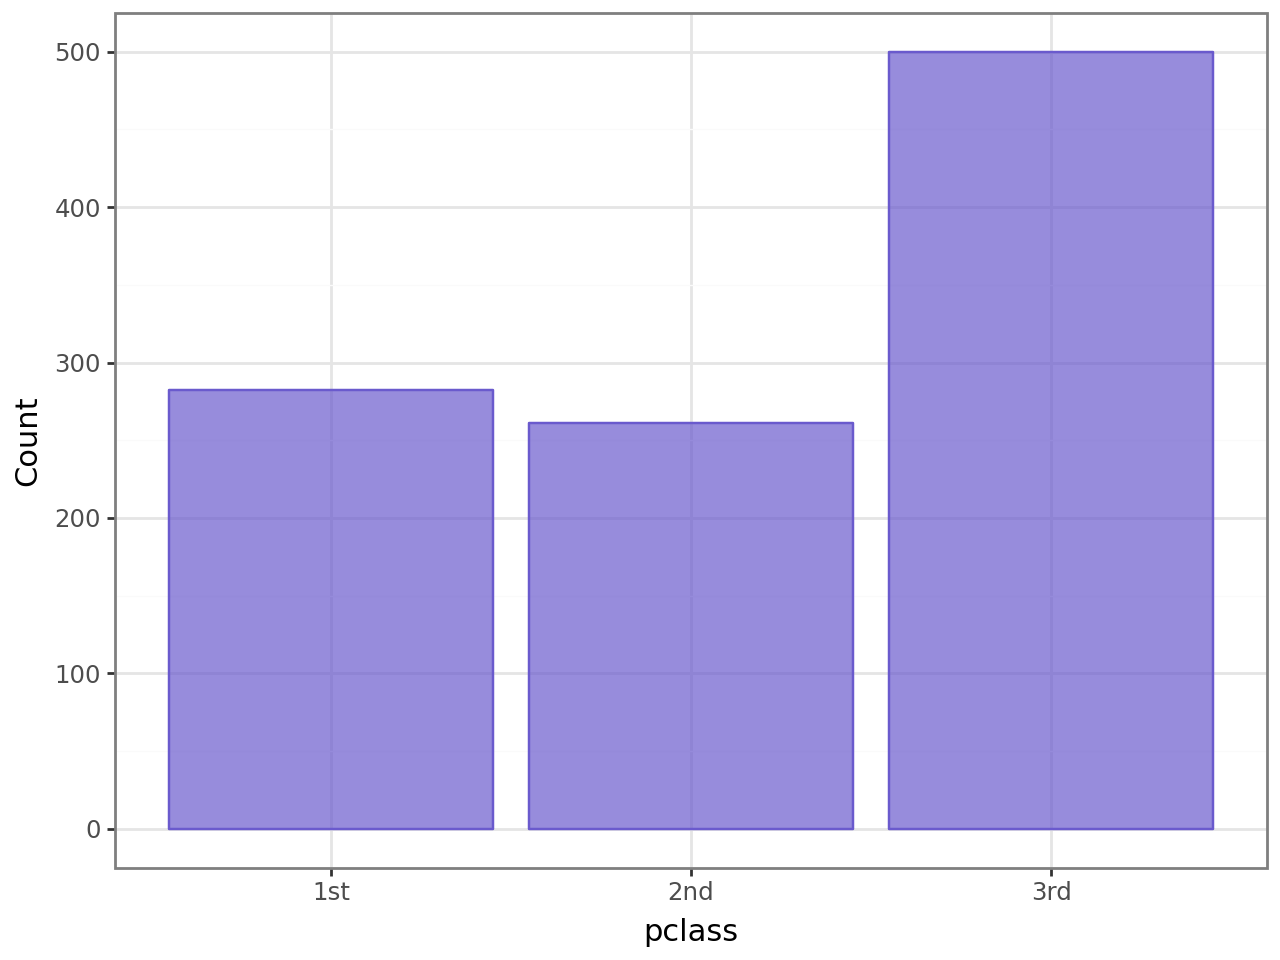

In [22]:
rsm.eda.visualize(titanic, x="pclass")

## Age Distribution

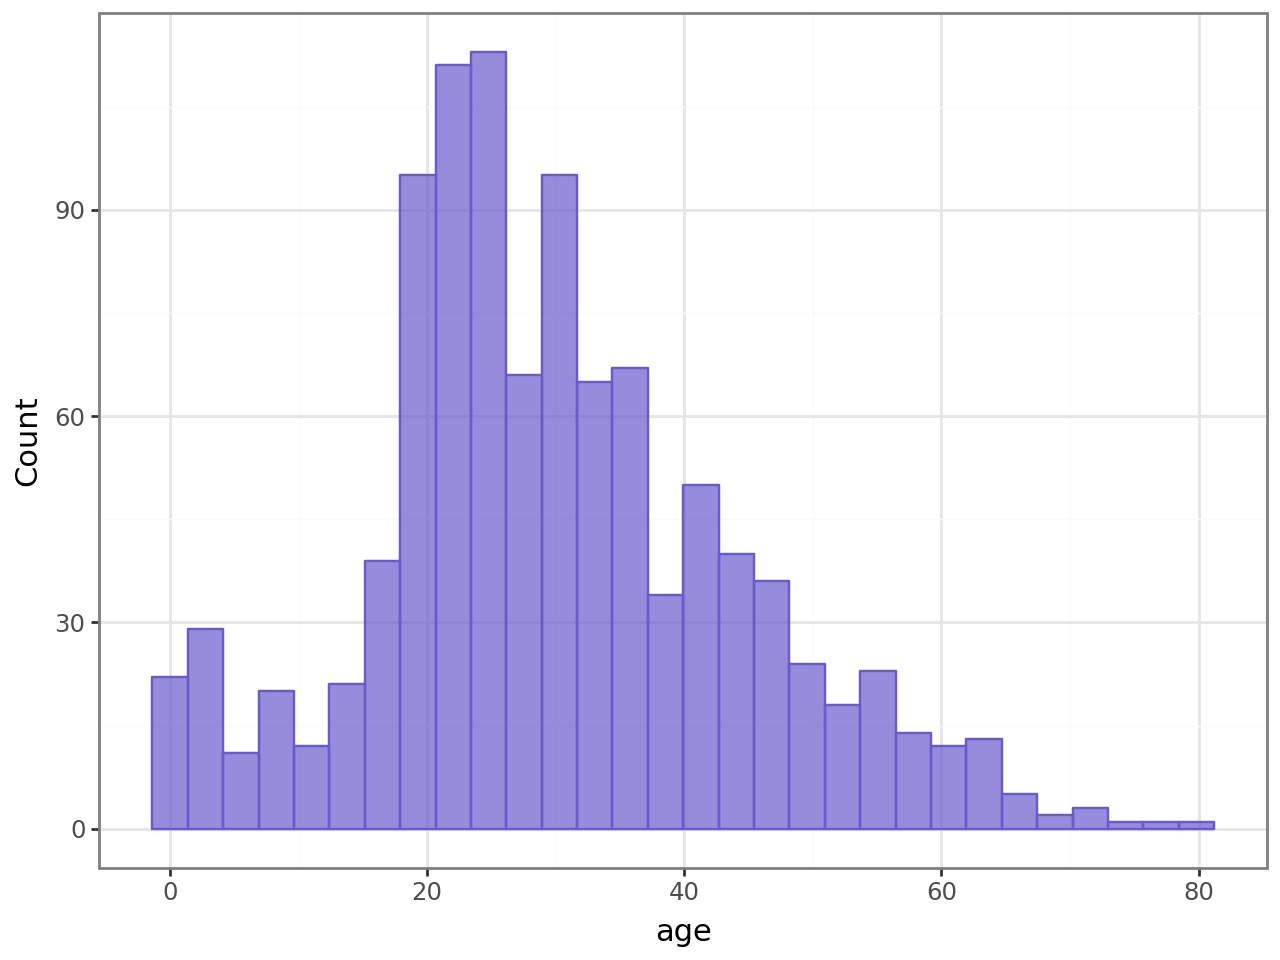

In [23]:
rsm.eda.visualize(titanic, x="age", bins=30)

## Fare Distribution by Class

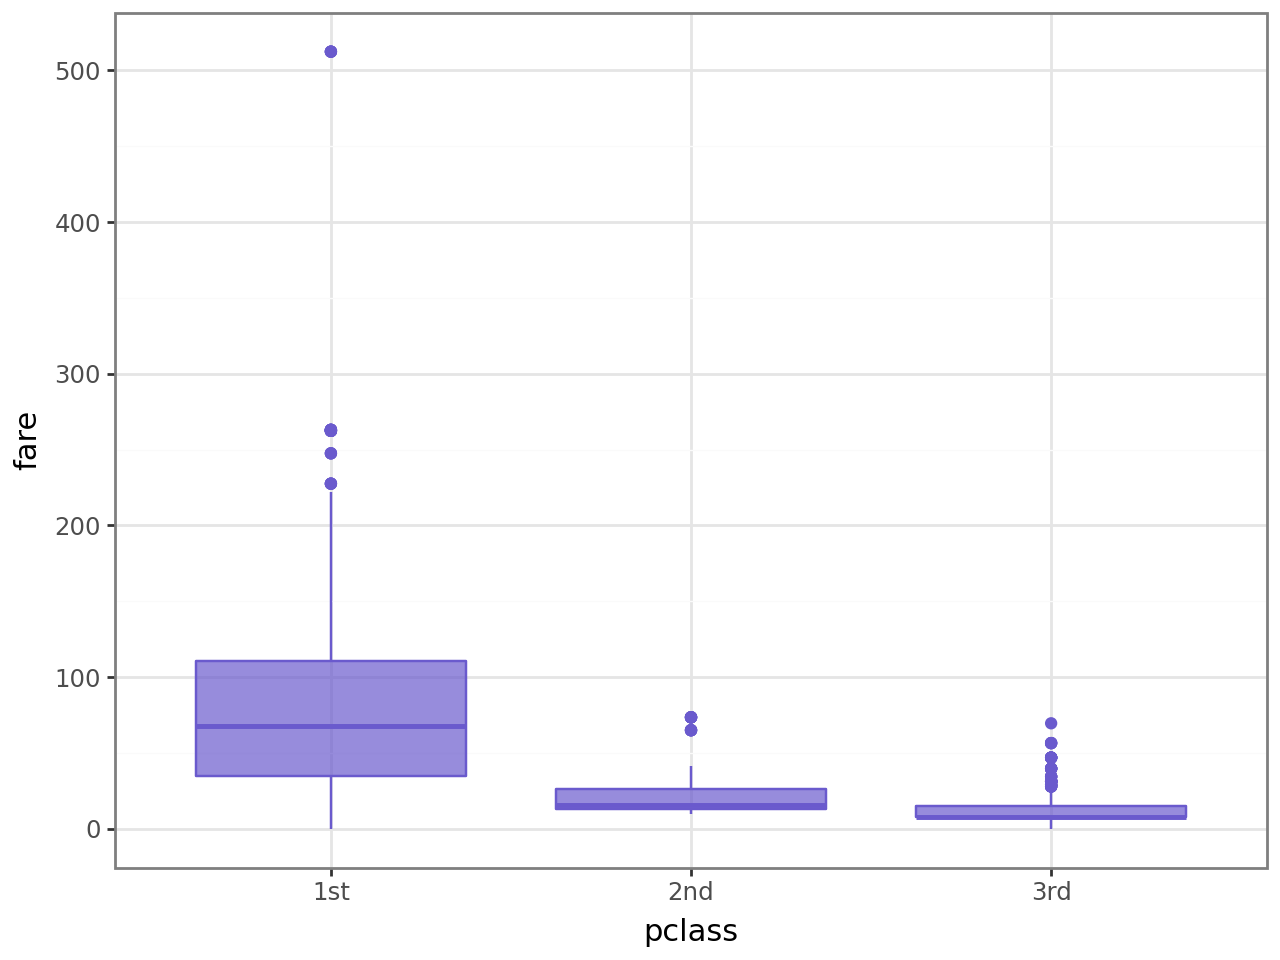

In [24]:
rsm.eda.visualize(titanic, x="pclass", y="fare", geom="box")

## Age by Survival Status

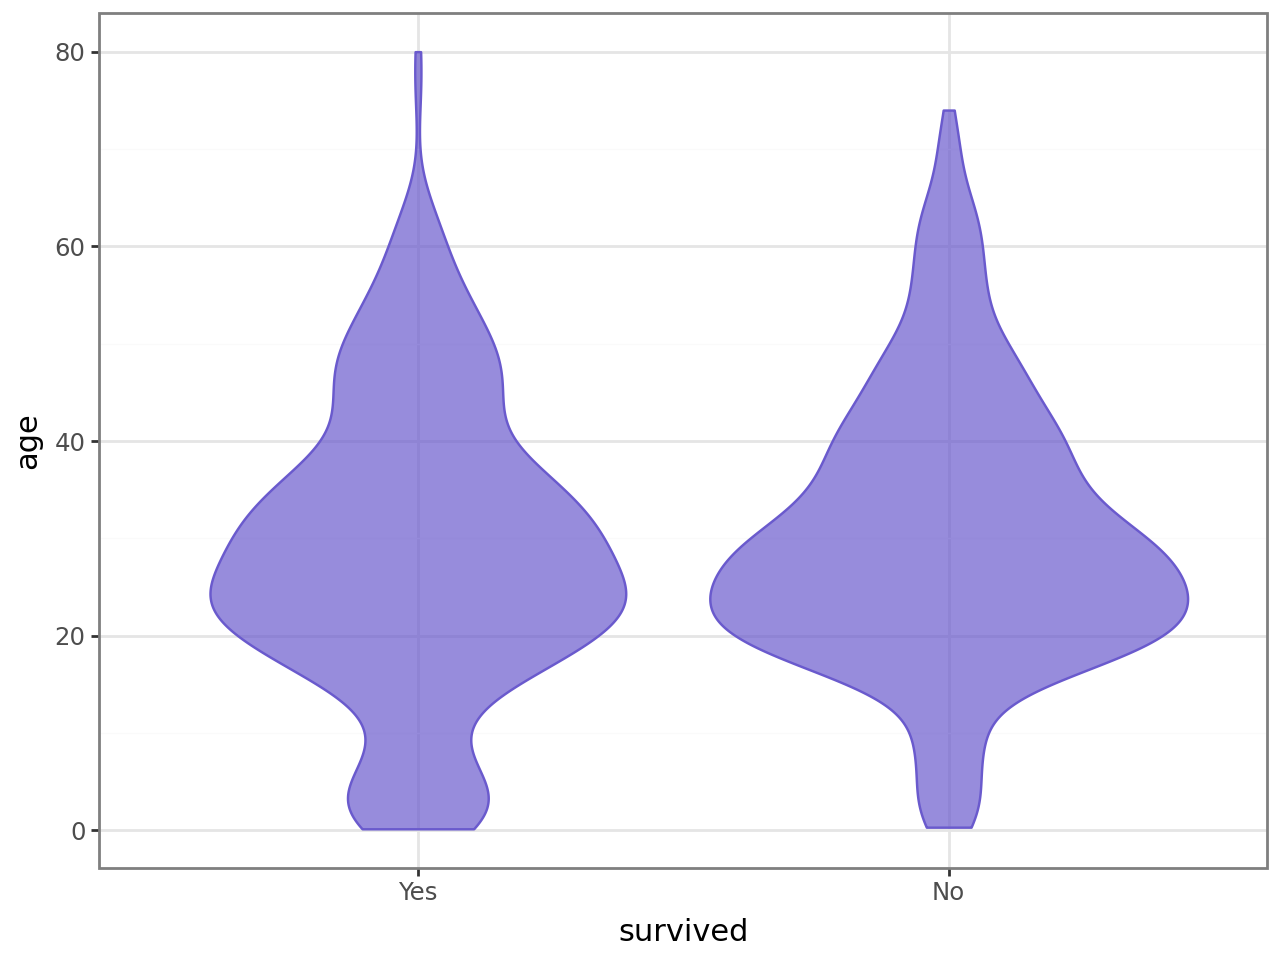

In [25]:
rsm.eda.visualize(titanic, x="survived", y="age", geom="violin")

## Age vs Fare

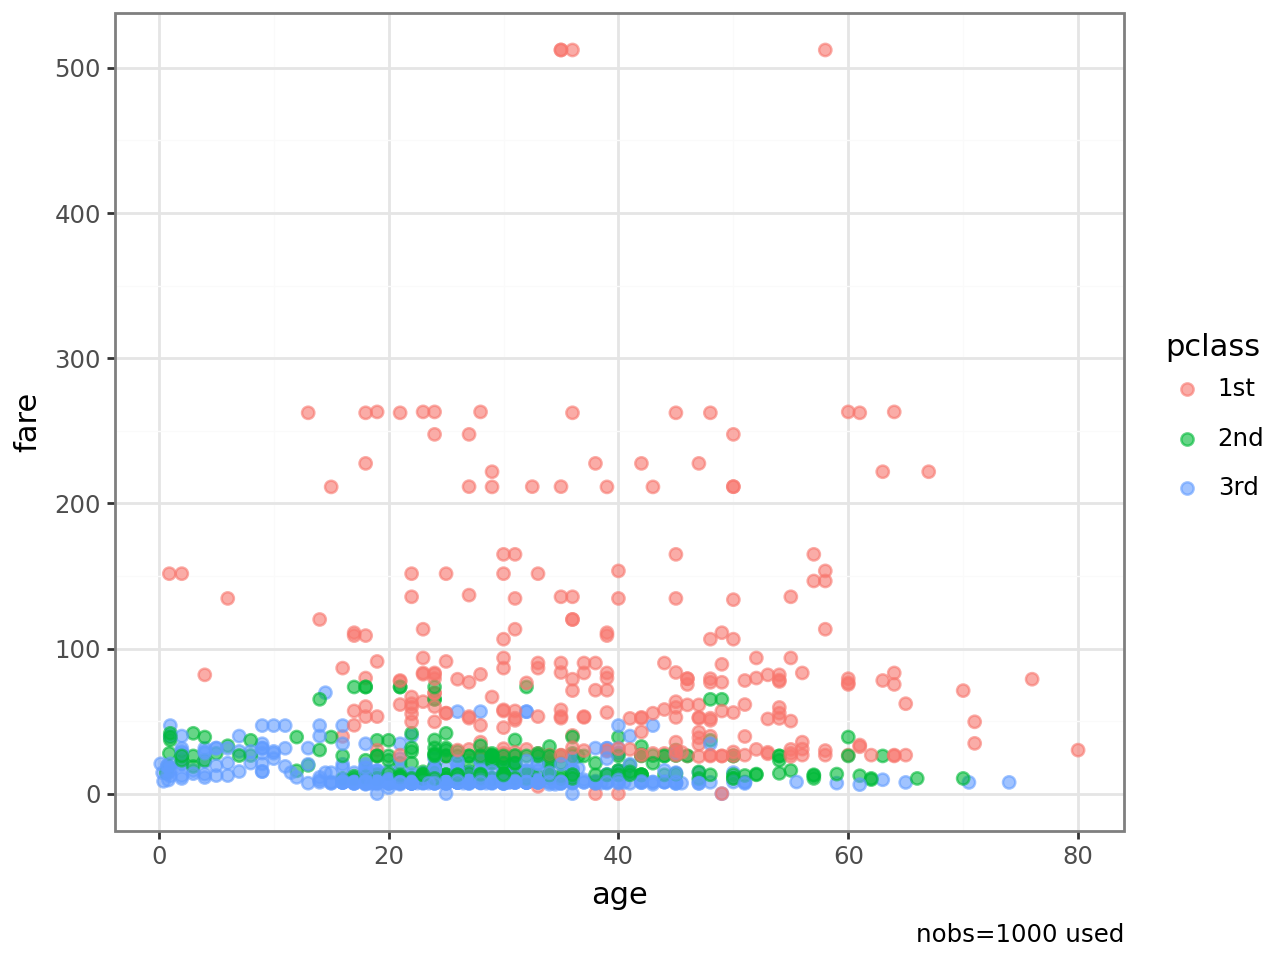

In [26]:
rsm.eda.visualize(titanic, x="age", y="fare", color="pclass", alpha=0.6)

## Age Distribution Faceted by Class and Survival

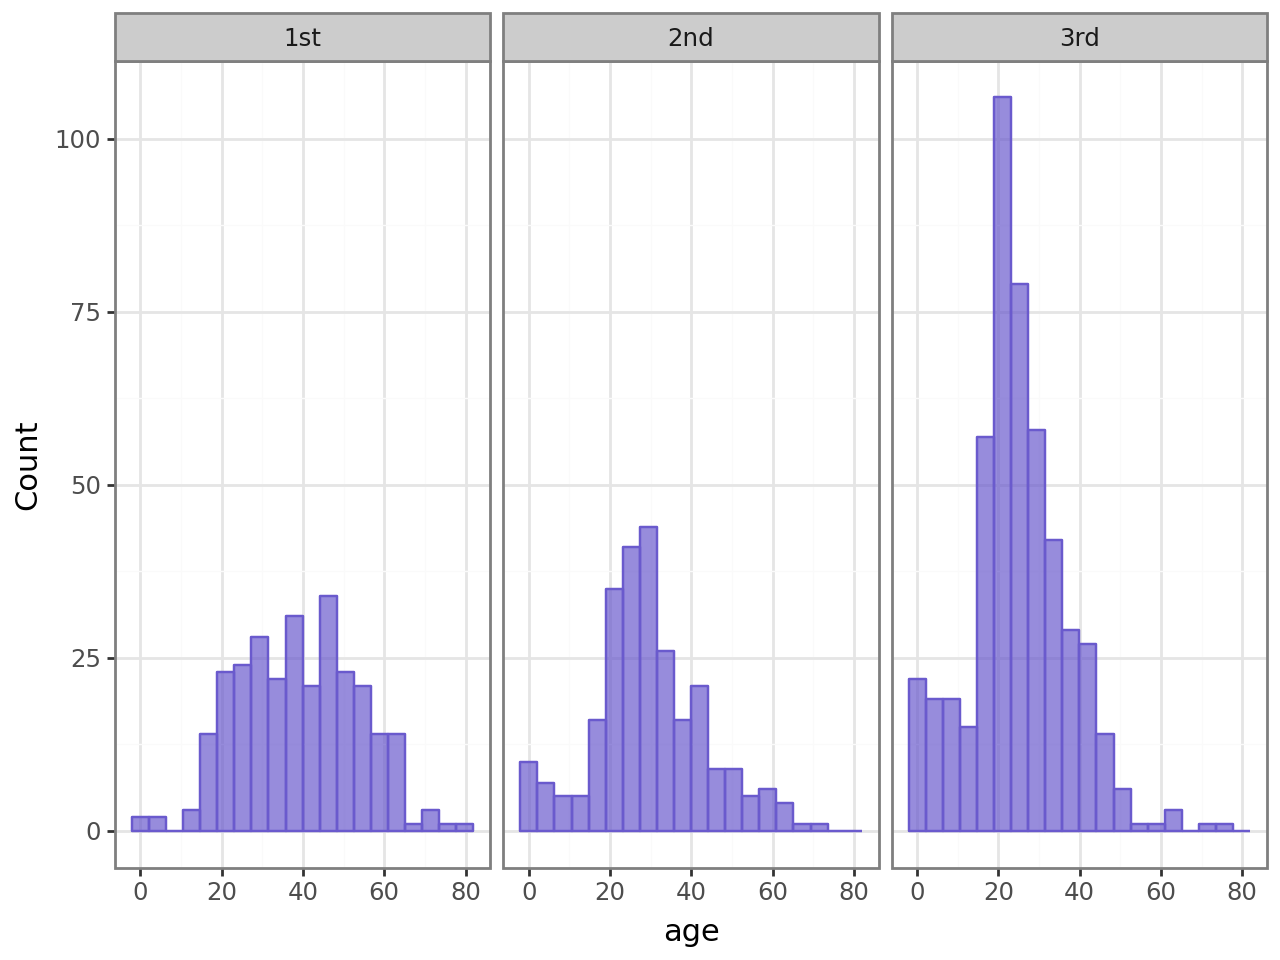

In [27]:
rsm.eda.visualize(titanic, x="age", facet="pclass", bins=20)

## Scatter with Jitter

Useful when x or y has discrete values to avoid overplotting.

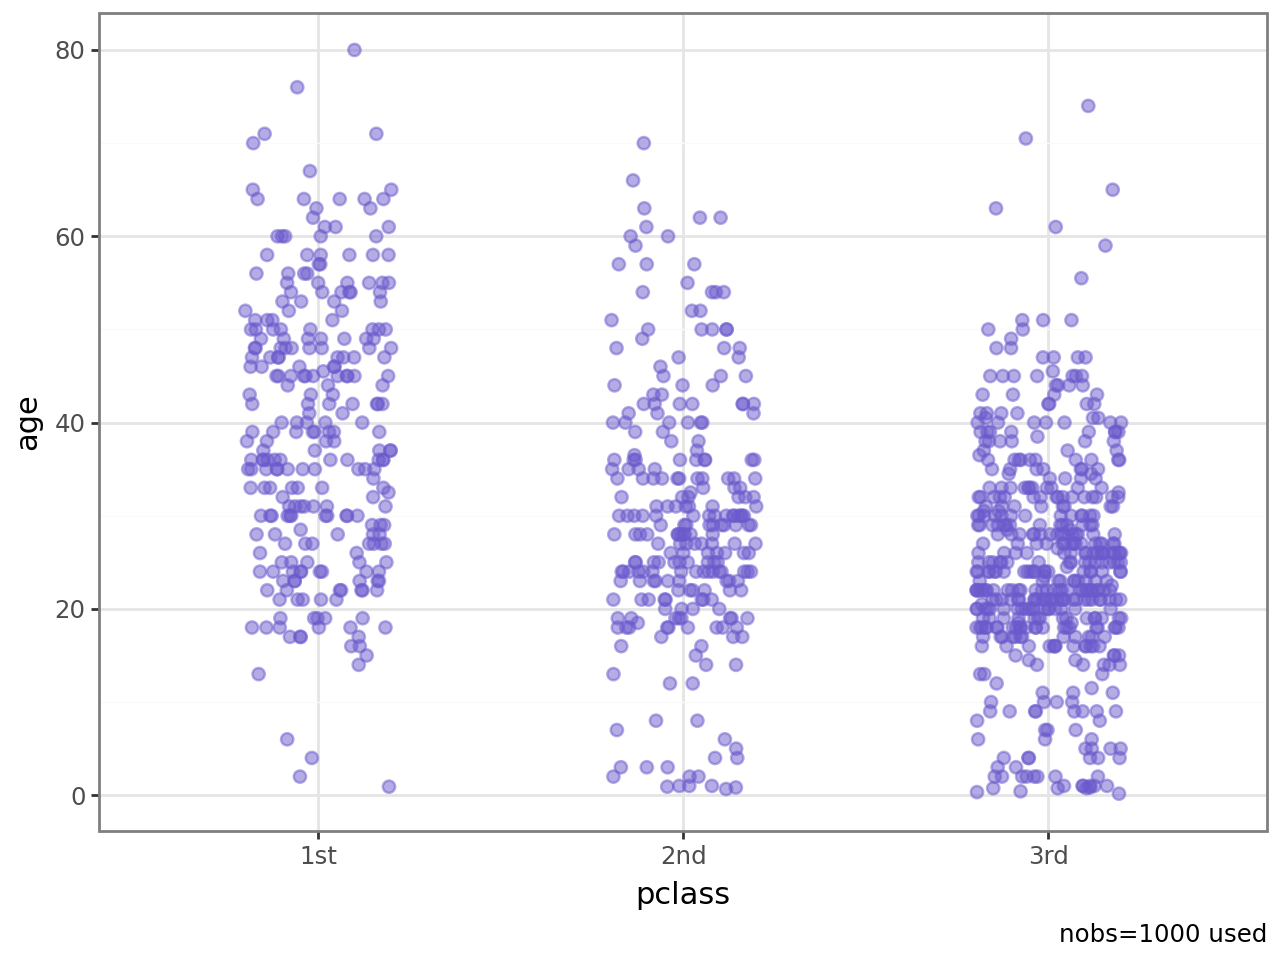

In [28]:
rsm.eda.visualize(titanic, x="pclass", y="age", jitter=True, alpha=0.5)

© Vincent Nijs (2026)